----------------------------------
#Case Study : Insurance Loss Prediction using **Linear Regression**
----------------------------------


## Context:

*  Losses incurred refers to benefits paid to policyholders during the current year. 
*  The company Kube Insurance Pvt. Ltd. has been facing losses when the policy holders claim insurance on the vehicle.
*  Here we are designing a machine learning algorithm to predict the insurance amount claimed by the policy holder's, based on the various factor's related to the policy holder and the vehicle.







------------------------------

## Problem Statement:
* The Kube insurance company has been facing losses by giving the insurance amount claimed by the policy holder. 
* We ahve to find out how the factors influence the losses sustained by the company.
* We are to design a algorithm that predicts the Loss suffered by the Kube insurance company by paying the amount as benefit to the policy holder.


------------------------------

# Solution to the Problem:
*   In this case study we will be focussing on the factors related to the policy holder such as age, driving experience, number of cars owned, maritial status, gender, age of the vehicle and the fuel type of the insured vehicle.
*   We will be using Linear Regression, to the see the effect of various factors on the anount claimed uner the insurance policy.

------------------------------

## Attribute Information:
* Policy Number: Unique ID for each policy holder
* Age: Policy holder's age
* Years of Driving Experience: The duration(in years) for which the policy  holder has been driving
* Number of Vehicles: Count of vehicles the policy holder owns
* Gender: Policy holder's gender
* Married: maritial status of the policy holder
* Vehicle Age: Age of the vehicle 
* Fuel Type: The type of fuel the vehicle runs on
* Losses: The amount of money the company paid to the policy holder as benefis

------------------------
# Concepts to Cover
------------------------
- 1. Overview of the data
- 2. Data Visualization
- 3. Data Preparation
- 4. Choose Model, Train and Evaluate
- 5. Conclusion
- 6. Add-on: Statsmodels

## Let's start coding

## Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Training_Material/Linear_Regression/Case_Study_1/

Mounted at /gdrive
/gdrive/My Drive/Training_Material/Linear_Regression/Case_Study_1


In [ ]:
# Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

## Load and explore the data

In [ ]:
# Reading the input data file
data = pd.read_csv("InsuranceLosses.csv") 

## Overview of the data

In [ ]:
df=data.copy()
df.head()

,Policy Number,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses
0,150024,24,5,1,M,Married,11,P,203.319595
1,144880,31,10,1,F,Single,6,P,402.197302
2,133742,56,37,1,M,Married,0,D,553.132096
3,151282,52,31,1,F,Married,15,P,292.430579
4,174407,20,3,1,M,Single,15,P,246.540576


## Think about it:

*   What do you interpret by looking at the data in the first 5 rows?
*   Do you see that each column has different scales of data.

  *   e.g. "Losses"column: from 203.319 to 553.132 as we can see from the first 5 rows.
  *   Number of vehicles: from 1 to 4.
  *   Age: from 16 to 70.

  So, what do you think about the effect of the different scales?

## Check number of rows and columns

In [ ]:
df.shape

(15290, 9)

# Let us have a look at the column names

In [ ]:
df.columns

Index(['Policy Number', 'Age', 'Years of Driving Experience',
       'Number of Vehicles', 'Gender', 'Married', 'Vehicle Age', 'Fuel Type',
       'Losses'],
      dtype='object')

# Check column types and missing values 

In [ ]:
df.rename(columns={"Married":"Maritial_status"},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Policy Number                15290 non-null  int64  
 1   Age                          15290 non-null  int64  
 2   Years of Driving Experience  15290 non-null  int64  
 3   Number of Vehicles           15290 non-null  int64  
 4   Gender                       15290 non-null  object 
 5   Maritial_status              15290 non-null  object 
 6   Vehicle Age                  15290 non-null  int64  
 7   Fuel Type                    15290 non-null  object 
 8   Losses                       15290 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 1.1+ MB


**Observations**

*   There are 15290 rows and 9 columns.
*   Column names have spaces and spacial characters which we would fix.

*   Gender,Married and Fuel Type are categorical variable and all other variables are numerical type
*   Dependant variable is Losses





## Column name has spaces in them so let us fix them

In [ ]:
df.columns = [col.replace(' ','_') for col in df.columns]

# Lets look at the missing values

In [ ]:
df.isna().sum()

Policy_Number                  0
Age                            0
Years_of_Driving_Experience    0
Number_of_Vehicles             0
Gender                         0
Maritial_status                0
Vehicle_Age                    0
Fuel_Type                      0
Losses                         0
dtype: int64

There are no missing values in the dataframe


In [ ]:
# Check the unique values in each column of the dataframe.
df.nunique()

Policy_Number                  15290
Age                               55
Years_of_Driving_Experience       54
Number_of_Vehicles                 4
Gender                             2
Maritial_status                    2
Vehicle_Age                       16
Fuel_Type                          2
Losses                         15289
dtype: int64

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)# to display numbers in digits
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Policy_Number,15290.000,149961.789,28947.841,100002.000,124900.500,149897.500,175019.500,200454.000
Age,15290.000,42.328,18.281,16.000,24.000,42.000,61.000,70.000
Years_of_Driving_Experience,15290.000,23.733,17.851,0.000,6.000,23.000,42.000,53.000
Number_of_Vehicles,15290.000,2.496,0.954,1.000,2.000,2.000,3.000,4.000
Vehicle_Age,15290.000,8.656,4.345,0.000,6.000,9.000,12.000,15.000
Losses,15290.000,389.860,253.729,12.535,226.434,354.938,488.677,3500.000


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Policy_Number,15290.000,NaN,NaN,NaN,149961.789,28947.841,100002.000,124900.500,149897.500,175019.500,200454.000
Age,15290.000,NaN,NaN,NaN,42.328,18.281,16.000,24.000,42.000,61.000,70.000
Years_of_Driving_Experience,15290.000,NaN,NaN,NaN,23.733,17.851,0.000,6.000,23.000,42.000,53.000
Number_of_Vehicles,15290.000,NaN,NaN,NaN,2.496,0.954,1.000,2.000,2.000,3.000,4.000
Gender,15290,2,F,7747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Maritial_status,15290,2,Married,7783,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Age,15290.000,NaN,NaN,NaN,8.656,4.345,0.000,6.000,9.000,12.000,15.000
Fuel_Type,15290,2,P,11670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Losses,15290.000,NaN,NaN,NaN,389.860,253.729,12.535,226.434,354.938,488.677,3500.000


## Insights

*   The "Gender" column has 2 unique values.i.e. The values are "Male" and "Female".
*  The "Maritial_status" column has 2 unique values .i.e. The values are "Married" and "Single".
*  The Years_of_Driving_Experience ranges from 16 years to 70 years.
*  Maximum number of vehicles covered under the insurance policy belong to "P" category.
*  There are 3 columns of categorical type and we need to convert them to numerical type. 



# Before we furthur process the data, let's have a look at the graphical visualization of the data to understand it in a better way!


# Univariate analysis

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.20, .80)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='blue') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='red', linestyle='-') # Add median to the histogram

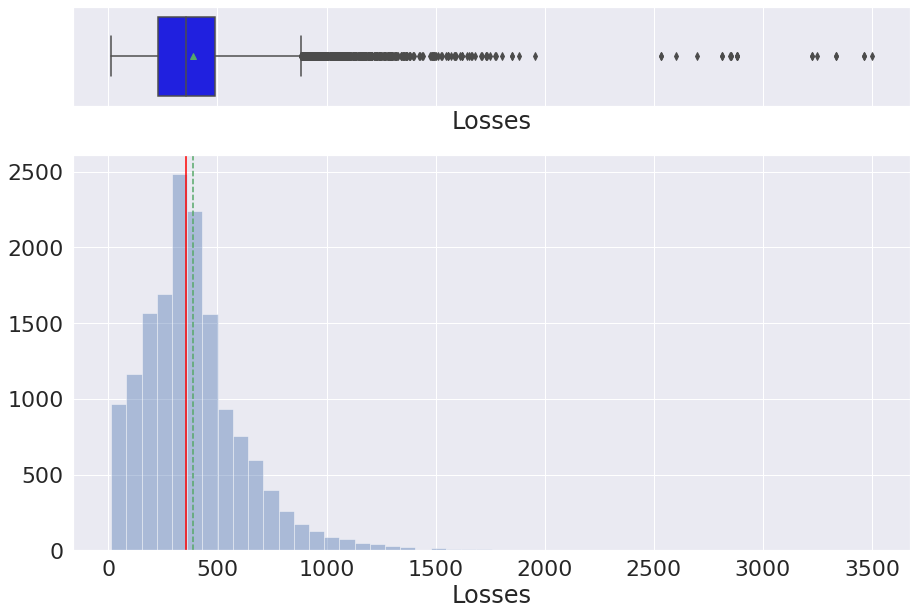

In [ ]:
histogram_boxplot(df.Losses)

# Observation
* There are outlier values in our dependant variable
* We cannot drop these values as they are in our dependant variable
* We will perform Log transformation on "Losses" column.

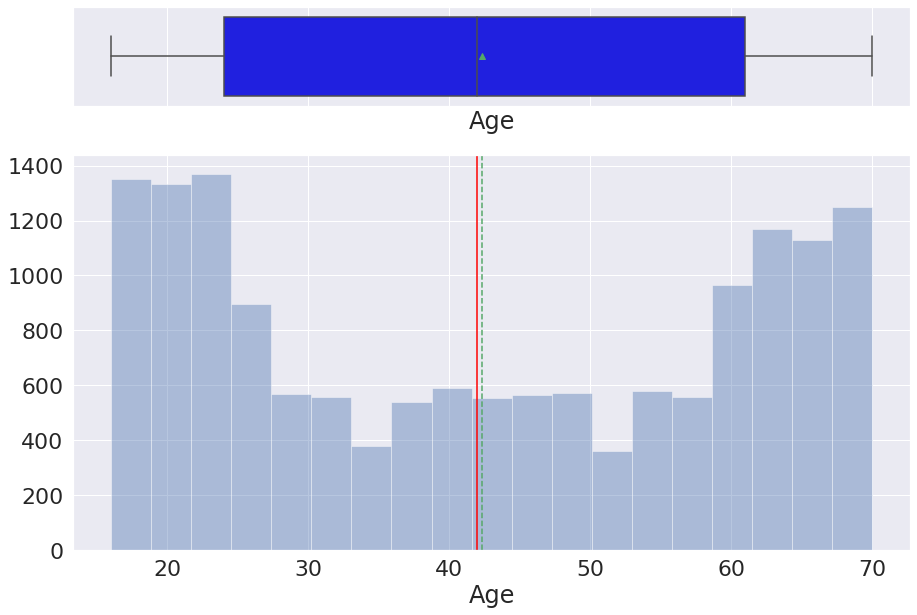

In [ ]:
histogram_boxplot(df.Age)

# Observation
* There is no outlier values in this column

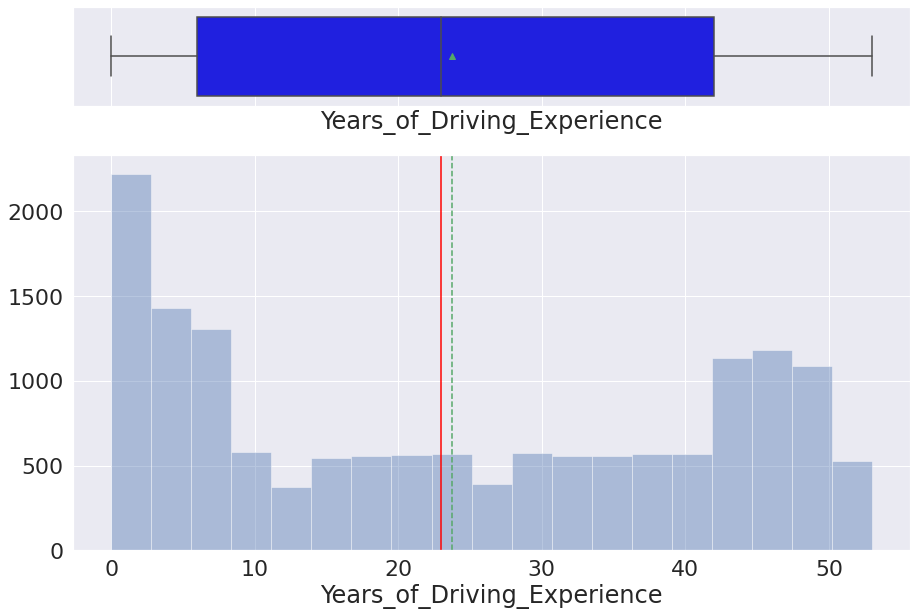

In [ ]:
histogram_boxplot(df.Years_of_Driving_Experience)

# Observation
* There is no outlier values in this column

# Add a New Column
Adding a new column to the dataframe with the name "Vehicle_Age_Category" based on conditions from the "Vehicle_Age" column
# Conditions
* "Vehicle_Age" = 0 then "New"
* "Vehicle_Age" = 0 then "New"
* "Vehicle_Age" >=7 and "Vehicle_Age" <12 then "Used"
* "Vehicle_Age" >=12 and "Vehicle_Age" <=15 then "Old"

In [ ]:
conditions = [
    ( df['Vehicle_Age'] ==0),
    ( df["Vehicle_Age"] <=6),
    (df["Vehicle_Age"] >=7) & (df["Vehicle_Age"] <12),
    (df["Vehicle_Age"] >=12) & (df["Vehicle_Age"] <= 15)]
values = ['New','New', 'Used', 'Old']

In [ ]:
df["Vehicle_Age_Category"]= np.select(conditions, values)

In [ ]:
df.head()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Maritial_status,Vehicle_Age,Fuel_Type,Losses,Vehicle_Age_Category
0,150024,24,5,1,M,Married,11,P,203.320,Used
1,144880,31,10,1,F,Single,6,P,402.197,New
2,133742,56,37,1,M,Married,0,D,553.132,New
3,151282,52,31,1,F,Married,15,P,292.431,Old
4,174407,20,3,1,M,Single,15,P,246.541,Old


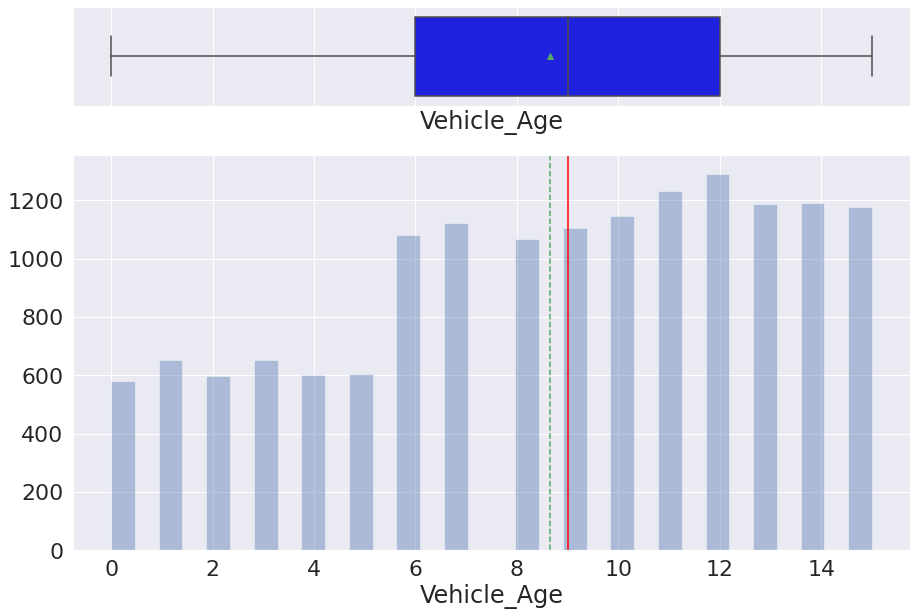

In [ ]:
histogram_boxplot(df.Vehicle_Age)

# Observation
* There is no outlier values in this column

In [ ]:
def perc_on_bar(plot, feature):

    '''

    plot

    feature: categorical feature

    the function won't work if a column is passed in hue parameter

    '''

    total = len(feature) # length of the column

    for p in ax.patches:

        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category

        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot

        y = p.get_y() + p.get_height()           # hieght of the plot

        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 

    plt.show() # show the plot

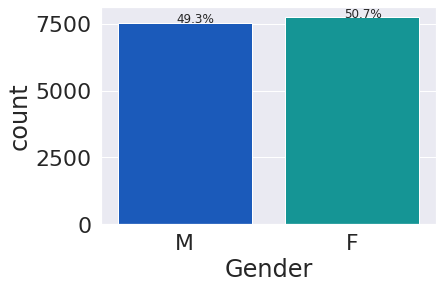

In [ ]:
ax = sns.countplot(df["Gender"],palette='winter')

perc_on_bar(ax,df["Gender"])

# Observation
* Both the classes in "Gender" column are almost equally represented.

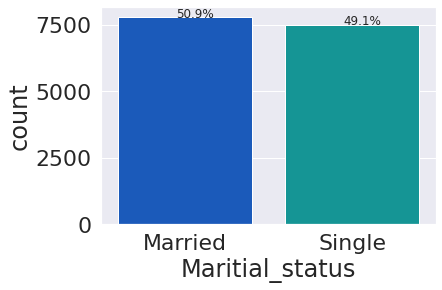

In [ ]:
ax = sns.countplot(df["Maritial_status"],palette='winter')

perc_on_bar(ax,df["Maritial_status"])

# Observation
* Both the classes in "Maritial_status" column are almost equally represented.

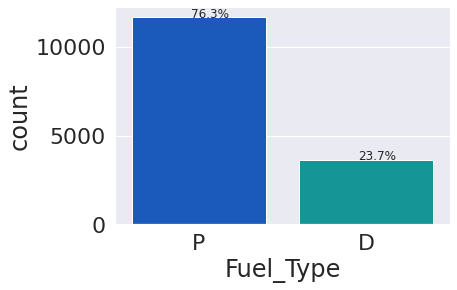

In [ ]:
ax = sns.countplot(df["Fuel_Type"],palette='winter')

perc_on_bar(ax,df["Fuel_Type"])

# Observation
* "Fuel_type" "P" is significantly represented more than "D".

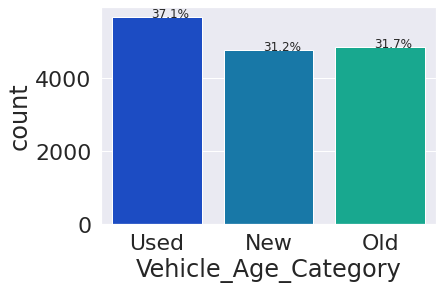

In [ ]:
ax = sns.countplot(df['Vehicle_Age_Category'],palette='winter')

perc_on_bar(ax,df['Vehicle_Age_Category'])

# Observation
* All the Tree categories in the "Vehicle _Age_Category" are almost equally represented.

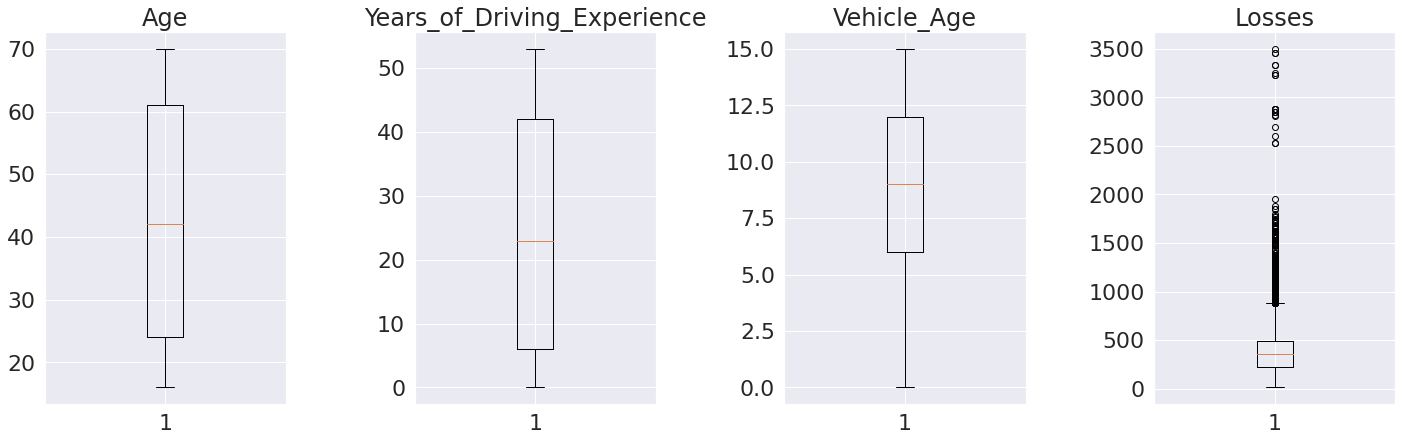

In [ ]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Policy_Number")
numeric_columns.remove("Number_of_Vehicles")
for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

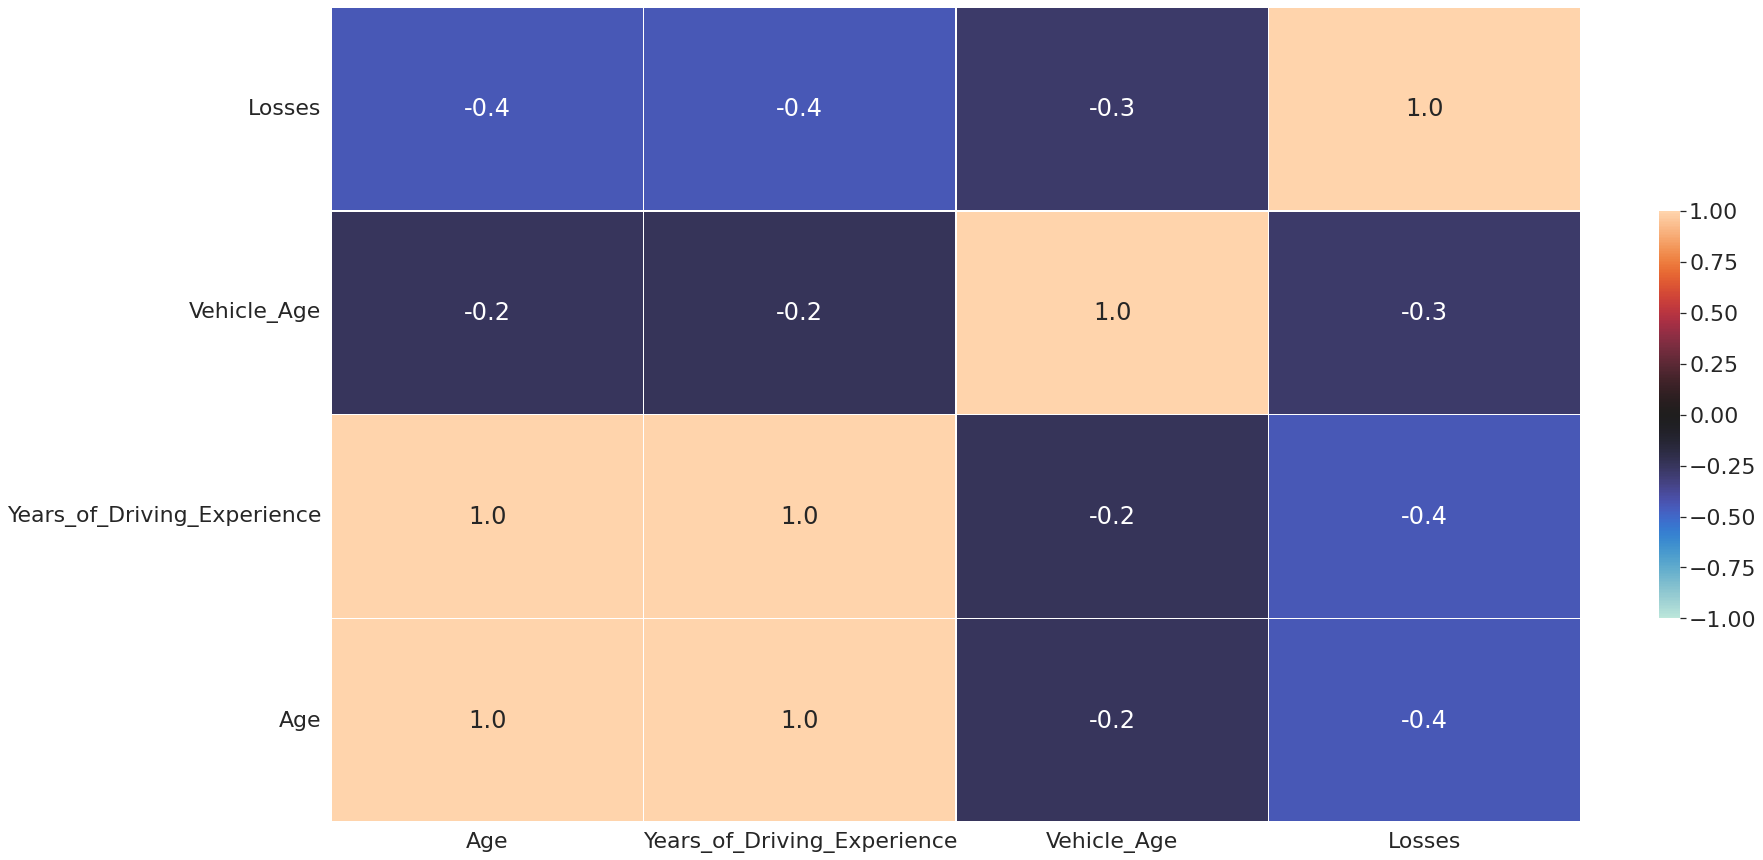

In [ ]:
#numeric_columns.remove('Policy_Number') # dropping Policy_Number column as it is unique variable
corr = df[numeric_columns].corr().sort_values(by=['Losses'],ascending=False) # sorting correlations w.r.t losses 


# Set up the matplotlib figure###################
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
             annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

# Observation
* There is a high multicollinearity .i.e. >0.8 between "Age" and "Years_of_Driving_Experience".
* We will treat the multicollinearity problem later on using VIF.

Vehicle Age vs Losses

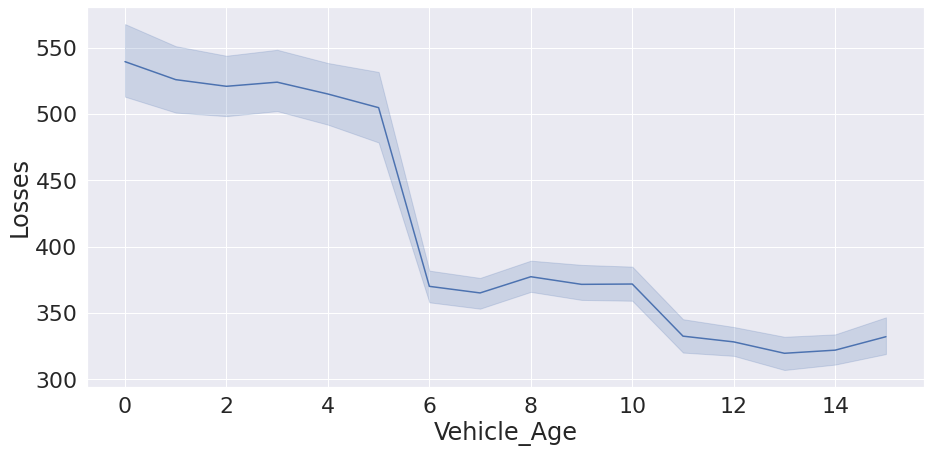

In [ ]:
#How the losses incurred by the company is related with the age of the vehicle
plt.figure(figsize=(15,7))
sns.lineplot(x='Vehicle_Age', y='Losses',
             data=df);

# Observation
*  As the vehicle gets old the benefit amount that the policy holder claims starts decreasing.

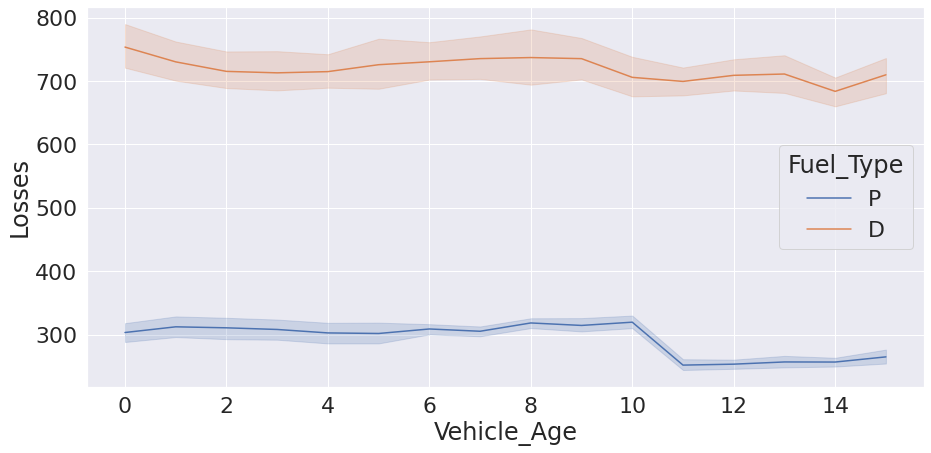

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Vehicle_Age', y='Losses',hue='Fuel_Type',
             data=df);

# Observation
*  Policy holders who have vehicle with "Fuel_Type" as "D" tend to claim more benefit amount.
* So company is facing more lossed through the Policy holders who have vehicle with "Fuel_Type" as "D". 

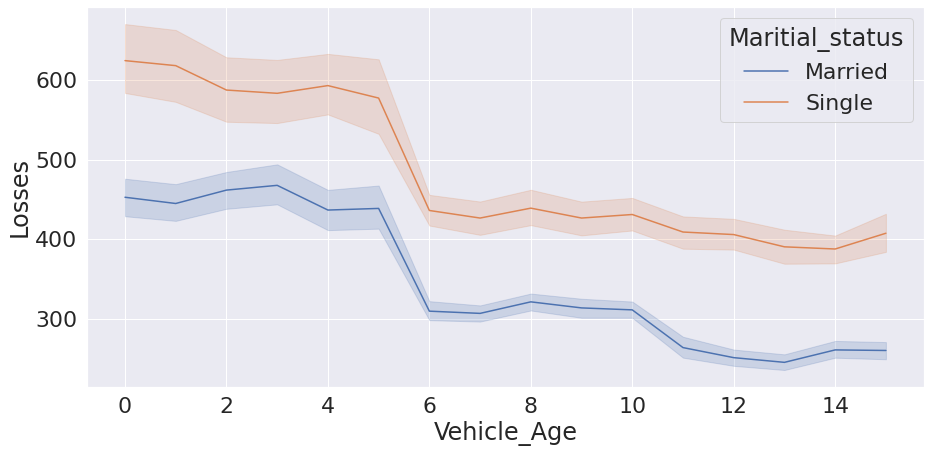

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Vehicle_Age', y='Losses',hue='Maritial_status',
             data=df);

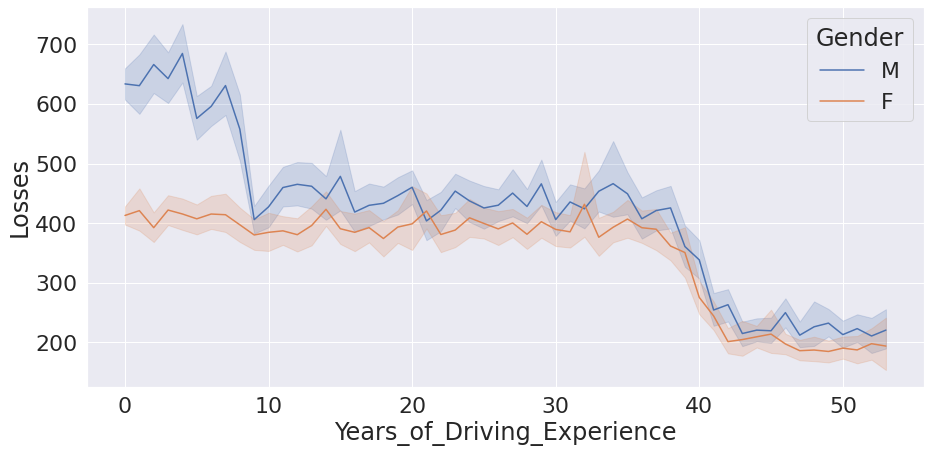

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Years_of_Driving_Experience', y='Losses',hue="Gender",
             data=df);

# Observation
* Company faces more loss from policy holders with "Gender" "M" and less driving experience who tend to claim more benefit amount the the "Gender" "F", which goes on decreasing as the driving experience increases

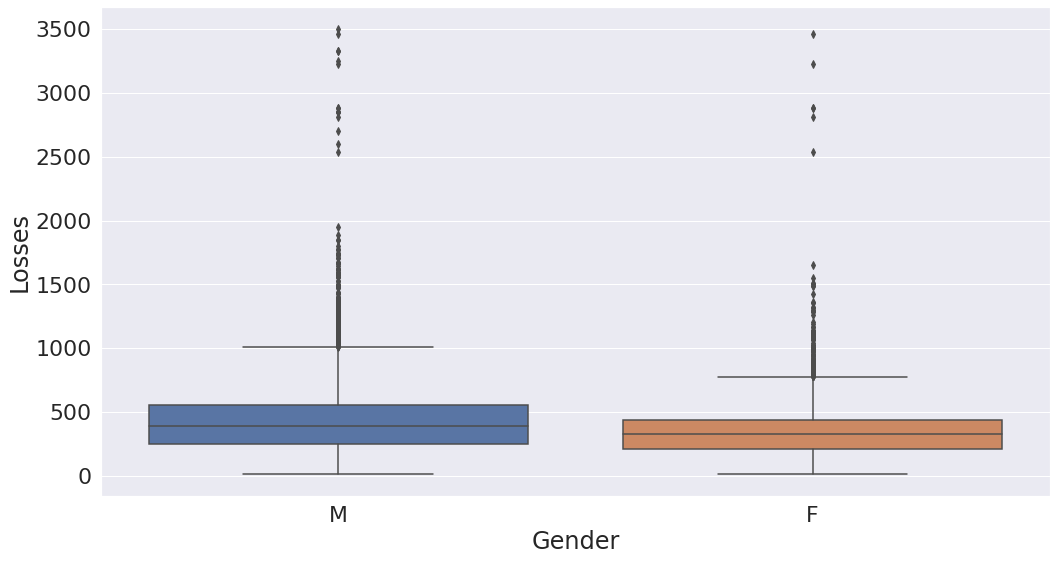

In [ ]:
plt.figure(figsize=(17,9))
sns.boxplot(y='Losses',x="Gender",data=df)
plt.show()

# Observation
*   There are Outliers in the Target Variable.
*   Outliers are present in both the Gender classes .i.e. M and F.



In [ ]:
#Converting categorical type to numeric type
df.Gender=df.Gender.replace({"M":0,"F":1})

In [ ]:
df.Maritial_status=df.Maritial_status.replace({"Married":0,"Single":1})

In [ ]:
df.Fuel_Type=df.Fuel_Type.replace({"P":0,"D":1})

In [ ]:
df.Vehicle_Age_Category=df.Vehicle_Age_Category.replace({"New":1,"Used":2,"Old":3})

# Model Building

In [ ]:
df['Losses_norm'] = np.log(df['Losses'])

In [ ]:
df.head()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Maritial_status,Vehicle_Age,Fuel_Type,Losses,Vehicle_Age_Category,Losses_norm
0,150024,24,5,1,0,0,11,0,203.320,2,5.315
1,144880,31,10,1,1,1,6,0,402.197,1,5.997
2,133742,56,37,1,0,0,0,1,553.132,1,6.316
3,151282,52,31,1,1,0,15,0,292.431,3,5.678
4,174407,20,3,1,0,1,15,0,246.541,3,5.508


In [ ]:
#Defining X and Y variables
x=df.drop(["Losses","Policy_Number","Losses_norm"],axis=1)
y=df.Losses_norm

print(x.shape)
print(y.shape)

(15290, 8)
(15290,)


In [ ]:

#split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

##  Choose Model, Train and Evaluate

In [ ]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    

In [ ]:
linearregression.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(x_test)

Intercept of the linear equation: 6.510057134911869

COefficients of the equation are: [-0.003845   -0.01553364  0.0053198  -0.12707118  0.2110833  -0.03049972
  0.56303777 -0.07969287]


In [ ]:
# MSE on test data
mean_squared_error(y_test, pred)

0.24940230228657553

The mean square error (MSE) squares the difference before summing them and then calculates the mean of the value.

In [ ]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

0.4994019446163336

The root mean square error (RMSE) is just like the MSE, squares the difference before summing them all and then takes the square root of the value.

In [ ]:
# R2 Squared: on test
r2_score(y_test, pred)

0.5405845711176878

- R^2 (coefficient of determination) regression score function.

- Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

- R^2 value is 0.54 which means that in this model independent variables are able to explain 54% of variances in dependent variable

## Conclusion

- The Training and testing scores are around 54% and both scores are comparable, hence the model is mot a very good fit.

- R2_score is 0.54, that explains 54% of total variation in the dataset. So, overall the model is not so satisfactory.

# Add-on: **statsmodels**

- Here is the complete syntax to perform the linear regression in Python using statsmodels.
- Statsmodels is a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration

In [ ]:
# Lets us build linear regression model using statsmodel 

x=sm.add_constant(x)
X_train1, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:            Losses_norm   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     1597.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:06:34   Log-Likelihood:                -7650.4
No. Observations:               10703   AIC:                         1.532e+04
Df Residuals:                   10694   BIC:                         1.538e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

** Observation**
- P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
- Negative values of coefficient shows that, Losses deceases with their increase.
- Positive values of coefficient shows that, Losses inceases with their increase.
- But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values 


## Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.54**, which is not so good!
2. **const coefficient** is the Y-intercept.
    - It means that if all the dependent variables (features: like Gender, Maritial_status,Age, Number_of_Vehicles and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
    - In our case, the value for const coeff is **6.51**

3. **Schooling coeff**: It represents the change in the output Y due to a change of one unit in the Schooling (everything else held constant).
4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.
5. **P >|t|**: It is p-value.
   
   * Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis 

    Ho : Independent feature is not significant 

    Ha : Independent feature is significant

Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level
  - A p-value of less than 0.05 is considered to be statistically significant.

   
6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

## Checking the Linear Regression Assumptions


1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedacity
4. Linearity of variables
5. Normality of error terms


### Checking Multicollinearity using VIF scores


### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βkis “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x.values,i) for i in range(x.shape[1])],index=x.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                         210.823
Age                           178.779
Years_of_Driving_Experience   177.513
Number_of_Vehicles              1.000
Gender                          1.041
Maritial_status                 1.074
Vehicle_Age                     7.480
Fuel_Type                       1.494
Vehicle_Age_Category            7.204
dtype: float64



* Age and Years_of_Driving_Experience have a VIF score of much greater than 5
* clearly these 2 variables are correlated with each other
* This is because as the age increases the years of driving experience will also increase.

## Treating Multicollinearity
 * To remove multicollinearity
  1. Drop every column one by one, that has VIF score greater than 5.
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till you get all VIF scores under 5

In [ ]:
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [ ]:
X_train1=calculate_vif_(x_train)

dropping 'Age' at index: 0
dropping 'Vehicle_Age_Category' at index: 6
dropping 'Number_of_Vehicles' at index: 1
Remaining variables:
Index(['Years_of_Driving_Experience', 'Gender', 'Maritial_status',
       'Vehicle_Age', 'Fuel_Type'],
      dtype='object')


In [ ]:
X_train1.head()

,Years_of_Driving_Experience,Gender,Maritial_status,Vehicle_Age,Fuel_Type
1795,24,1,0,9,0
11340,42,0,1,14,0
11417,10,1,0,12,0
1037,5,1,1,11,1
13350,47,1,1,11,0


* Since all the VIF values are below 8. Lets us now try check for the R2 and Adjusted R2

In [ ]:
olsmod1 = sm.OLS(y_train, X_train1)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                                 OLS Regression Results                                
Dep. Variable:            Losses_norm   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                          2.243e+04
Date:                Wed, 17 Nov 2021   Prob (F-statistic):                        0.00
Time:                        19:11:38   Log-Likelihood:                         -20914.
No. Observations:               10703   AIC:                                  4.184e+04
Df Residuals:                   10698   BIC:                                  4.187e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

### No feature has p value greater than 0.05, so we'll consider features in X_train1 as the final ones and olsres1 as final model

### Observations
* Now Adjusted R-squared is 0.913, Our model is able to explain 91.3% of variance that shows model is good.
* The Adjusted-R squared in Olsres0 it was 54% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model much.
     

### Now we'll check rest of the assumptions on model - olsres7
1. Mean of residuals should be 0 
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity

# Mean of residuals should be 0

In [ ]:
residual= olsres1.resid
np.mean(residual)

0.4167134519877919

* Mean of residuals is very close to 0.

### TEST FOR LINEARITY 

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear

In [ ]:
residual=olsres1.resid
fitted=olsres1.fittedvalues #predicted values

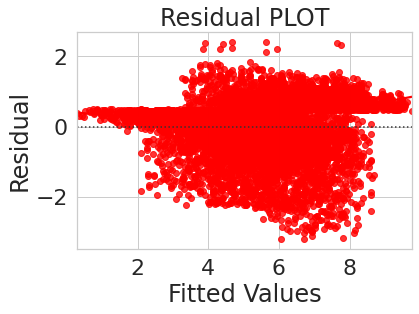

In [ ]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="red",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.
No pattern in residual hence 1st assumptions is satisfied

### TEST FOR NORMALITY

**What is the test?**

* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What do non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to Check the Normality?**

* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

**What is the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh etc as per our data

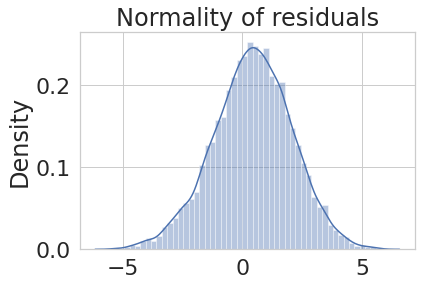

In [ ]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

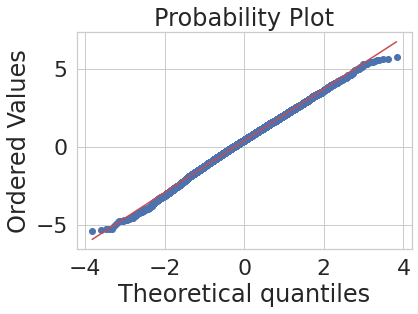

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [ ]:
stats.shapiro(residual)

(0.9984572529792786, 9.281268198435555e-09)

* The residuals are not normal as per shapiro test, but as per QQ plot they are approximately normal.
* The issue with shapiro test is when dataset is big, even for small deviations, it shows data as not normal
* Hence we go with QQ plot and say that residuals are normal
* We can try to treat data for outliers and see if that helps in further normalising the residual curve

### TEST FOR HOMOSCEDASTICITY

* Test -goldfeldquandt test

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.


Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train1)
lzip(name, test)

[('F statistic', 1.0206603101806704), ('p-value', 0.22735037159569996)]

Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

### Now we have checked all the assumptions and they are satisfied, so we can move towards prediction part

In [ ]:
X_train1.columns

Index(['Years_of_Driving_Experience', 'Gender', 'Maritial_status',
       'Vehicle_Age', 'Fuel_Type'],
      dtype='object')

* Selecting columns from test data that we used to create our final model

In [ ]:
X_test_final = X_test[X_train1.columns]

In [ ]:
X_test_final.head()

,Years_of_Driving_Experience,Gender,Maritial_status,Vehicle_Age,Fuel_Type
10285,41,0,1,9,0
12254,37,1,0,4,1
11723,3,1,1,12,0
3409,6,1,0,13,0
11871,47,0,1,10,0


In [ ]:
y_pred = olsres1.predict(X_test_final)

### Checking the performance on train and test: metric used - RMSE

In [ ]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 1.7075461255377953
Test error: 1.7036936456850522


##Obseration

### Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting .
### Hence we can conclude the model "olsres1" is good for prediction as well as inference purpose


# Appendix:


- **warnings.filterwarnings("ignore")** : Never print matching warnings.

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pairplot** : Plot pairwise relationships in a dataset.

- **boxplot** : Draw a box plot to show distributions with respect to categories.

- **distplot** : Flexibly plot a univariate distribution of observations.

- **pandas.DataFrame.corr** : Compute pairwise correlation of columns, excluding NA/null values.

- **sklearn.linear_model.LinearRegression** : Ordinary least squares Linear Regression.

- **scipy.stats** : This module contains a large number of probability distributions as well as a growing library of statistical functions.

- **statsmodels** : It is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
    - An extensive list of result statistics are available for each estimator.
    - The results are tested against existing statistical packages to ensure that they are correct.
    - The online documentation is hosted at [statsmodels.org](https://www.statsmodels.org/stable/index.html).